## 선형 회귀

### 데이터들 사이의 상관관계 또는 추이를 예측하거나, 대상 값 자체를 예측하는 지도학습 알고리즘

+ 예를 들어, 방의 개수와 집값의 상관 관계 또는 과거 10년간의 영업 실적을 분석하여 미래의 영업 실적을 예측하는 것

+ 하나의 종속변수와 하나 이상의 독립변수 간의 상관관계를 기본으로 하여 하나의 n차 선형방정식으로 변수 관계를 일반화하는 분석방법

### 선형성(Linearity)

#### 두 변수의 관계가 하나의 직선의 형태로 설명될 수 있는 관계를 지닌다는 것

+ 하나의 독립변수를 통해 종속변수 값을 잘 설명할 수 있으면 단순 선형회귀라 하고 하나 이상의 독립변수를 통해 종속변수 값을 잘 설명할 수 있으면 다중 선형회귀라 함

### 회귀분석의 중요 개념

### $ \hat y = ax+b+ \epsilon $

### 선형방정식 : 두 변수의 관계를 방정식으로 표현

+ 기울기( a ) : 독립변수가 종속변수에 얼마나 영향을 주는지 그 크기와 방향을 파악

+ 절편( b ) : 회귀선을 얼마나 위/아래로 평행이동시키는지 알수 있음




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 공부한 시간 대비 성적 예측을 단순선형회귀로 풀기

In [2]:
time = [2,4,6,8]
jumsu = [81, 93, 91, 97]

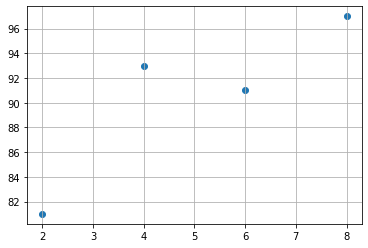

In [9]:
plt.scatter(time, jumsu)
plt.grid()

### 최소제곱법OLS

* 선형방정식의 회귀계수를 구하는 일반적인 방법

### a = \frac {\sum (x - \bar x)(y - \bar y) } {\sum (x - \bar x) ^ 2}  $

### $ b = \bar y - (a \cdot \bar x) $




#### 각 변수의 평균 구함

In [13]:
tmean = np.mean(time)
jmean = np.mean(jumsu)
print(tmean, jmean)

5.0 90.5


#### 기울기를 구하는 식 중 분자에 해당하는 수식을 함수로 정의

In [17]:
def divtop(x, xmean, y, ymean):
    sums = 0
    for i in range(len(x)):
        sums += (x[i] - xmean) * (y[i] - ymean)
    return sums

#### 기울기를 구하는 공식에서  분자와 분모 부분을 각각 구함

In [22]:
dividen = divtop(time, tmean, jumsu, jmean)
divsor = sum([(t - tmean)**2 for t in time])

In [25]:
a = dividen / divsor
b = jmean - (a * tmean) 
print(a, b)

2.3 79.0


#### 예측값을 넣어 회귀선 그려보기
+ 구해진 선형방정식(y=2.3x + 79)에 x값을 넣어 예측값 산출

In [27]:
z = [(a*t+b) for t in time]
z

[83.6, 88.2, 92.8, 97.4]

#### 실제값과 예측선을 시각화

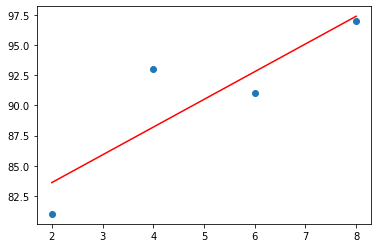

In [30]:
plt. scatter(time, jumsu)
plt.plot(time, z, 'r')

### 평균제곱근 오차RMSE

+ 최소제곱법을 이용해서 회귀직선을 그어 보았지만 다양한 상황에 적합한 직선을 긋기에는 부족

+ 즉, 여러 개의 독립변수로 구성된 데이터에 대한 회귀직선을 긋기에는 무리가 있음

+ 따라서, 여러 독립변수로 구성된 데이터의 경우 임의의 선을 그린 후 이 선의 오차를 평가하고 조금씩 수정해 나가는 방법이 필요

### 주어진 선의 오차를 평가하는 방법 : 평균제곱근오차

#### (실제값 - 예측값)의 제곱합 나누기 데이터갯수의 제곱근

### $ \sqrt {\frac {\sum (y - \hat y)^2} {n}} $

#### 최소제곱법에서는 공식을 이용해서 바로 기울기/절편 계산

+ 한편, 평균제곱근오차에서는 **기울기와 절편에 아무값이나 대입**하고 오차를 구해서 이 **오차를 최소화하는 방식**을 사용

In [31]:
from sklearn.metrics import mean_squared_error

#### 시도 1 -> 기울기 : 3, 절편 : 76

In [33]:
a = 3
b = 76
z = [(a*t+b) for t in time]

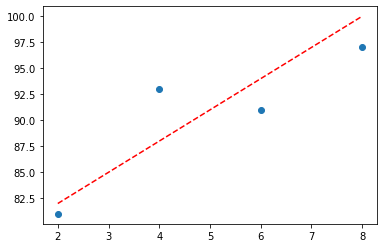

In [35]:
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

In [37]:
MSE = mean_squared_error(jumsu, z)
round(np.sqrt(MSE),2)

3.32

#### 시도 2 -> 기울기 : 1, 절편 :76

In [38]:
a = 1
b = 76
z = [(a*t+b) for t in time]

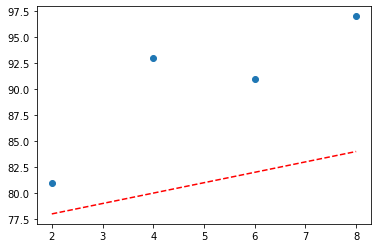

In [39]:
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

In [40]:
MSE = mean_squared_error(jumsu, z)
round(np.sqrt(MSE),2)

10.34

#### 시도 3 -> 기울기 : 3, 절편 : 80

In [46]:
a = 3
b = 80
z = [(a*t+b) for t in time]

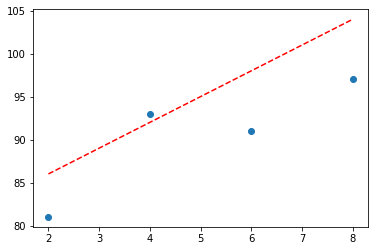

In [47]:
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

In [48]:
MSE = mean_squared_error(jumsu, z)
round(np.sqrt(MSE),2)

5.57

#### 시도 4 -> 기울기 : 3, 절편 : 70

In [49]:
a = 3
b = 70
z = [(a*t+b) for t in time]

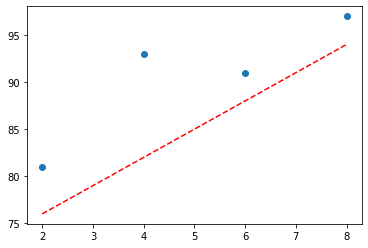

In [50]:
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

In [51]:
MSE = mean_squared_error(jumsu, z)
round(np.sqrt(MSE),2)

6.4

#### 시도 5 -> 기울기 : 5, 절편 : 76

In [52]:
a = 5
b = 76
z = [(a*t+b) for t in time]

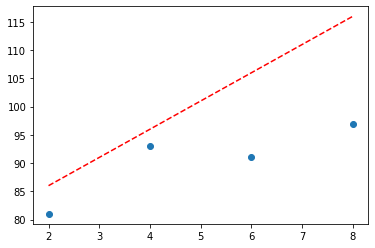

In [53]:
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

In [54]:
MSE = mean_squared_error(jumsu, z)
round(np.sqrt(MSE),2)

12.45

#### 결론
+ 기울기가 커져도 작아져도 오차 증가

### 기울기의 변화에 따른 오차의 변화를 시각화

In [64]:
weights = [] # 기울기
loss = []    # 오차
b = 0        # 절편은 편의상 0

In [65]:
for w in range(-20, 50): # 기울기를 -20 ~ 50 으로 설정
    z = [w * v + b for v in time]  # 예측값
    weights.append(w)
    loss.append(mean_squared_error(jumsu, z))  # 오차 계산

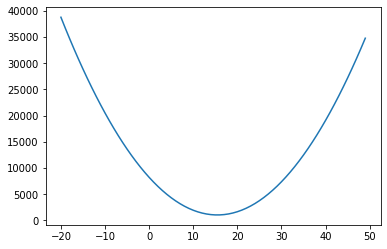

In [66]:
plt.plot(weights, loss)
plt.show()

### 기울기와 오차의 관계

+ 그래프에서 확인하듯이 기울기와 오차의 관계는 이차함수 형태

#### 오차가 가장 작은 부분은?

+ 그래프 하단의 볼록한 부분

#### 기울기를 구하는 방법

+ 임의의 점을 선택 -> 미분 실시 -> 기울기가 0인지 확인

+ 기울기가 0일때까지 계속 반복 시행

+ 미분의 기울기를 이용한 **경사하강법**을 적용



### 선형 회귀를 이용한 보스턴 집값 예측
+ 1978년 보스턴 주택 가격
+ 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

In [68]:
from sklearn.datasets import load_boston

In [86]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 산점도 행렬

In [87]:
from pandas.plotting import scatter_matrix

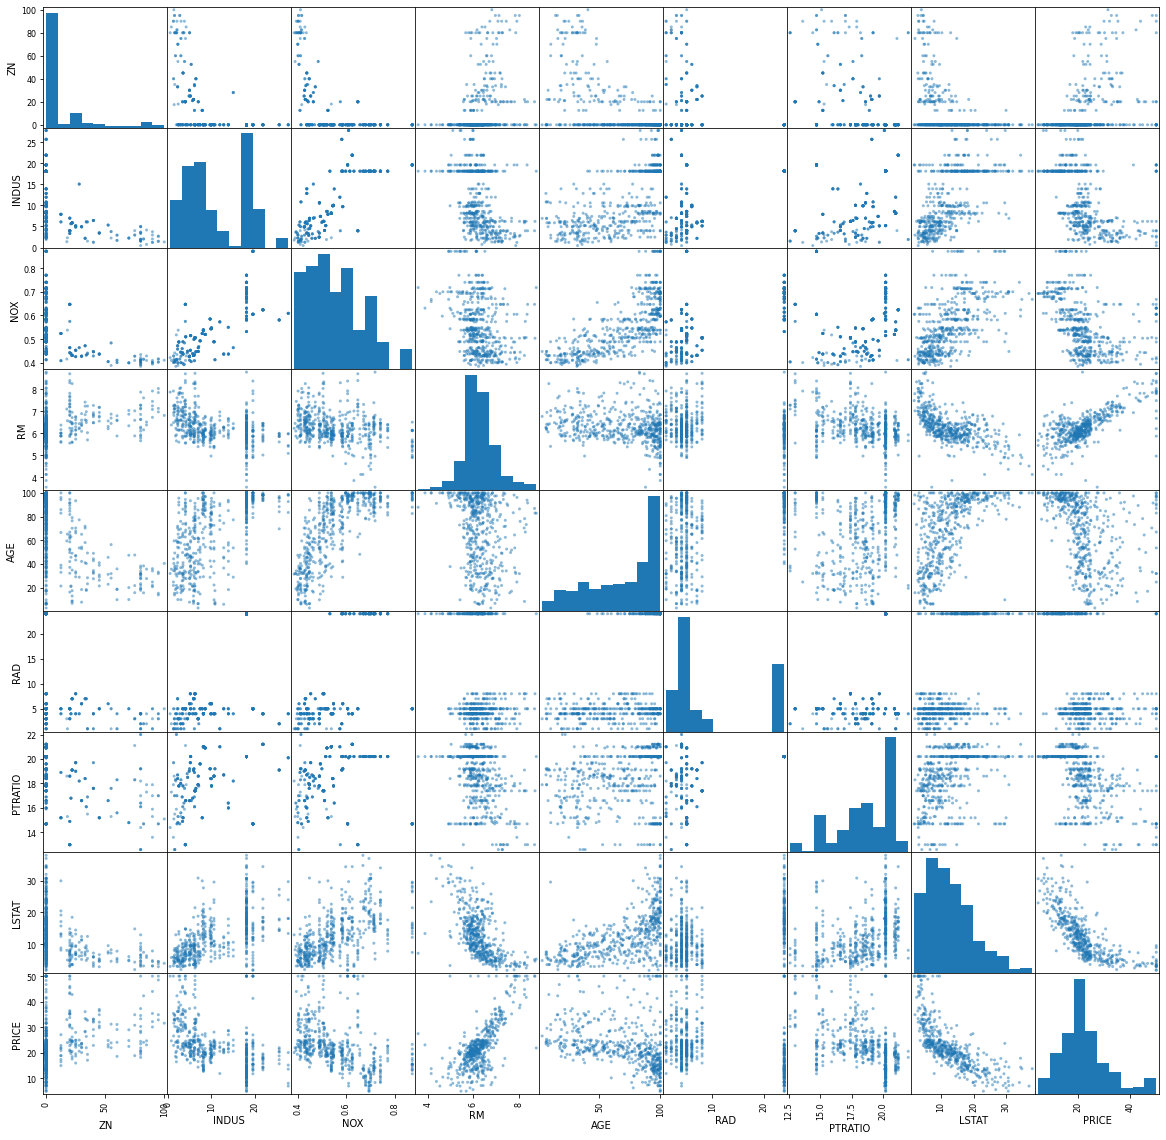

In [76]:
sm = df.iloc[:, [1,2,4,5,6,8,10,12,13]]
scatter_matrix(sm,figsize=(20,20))
plt.show()

#### 각 독립변수에 종속변수를 이용해서 회귀선을 그려보기

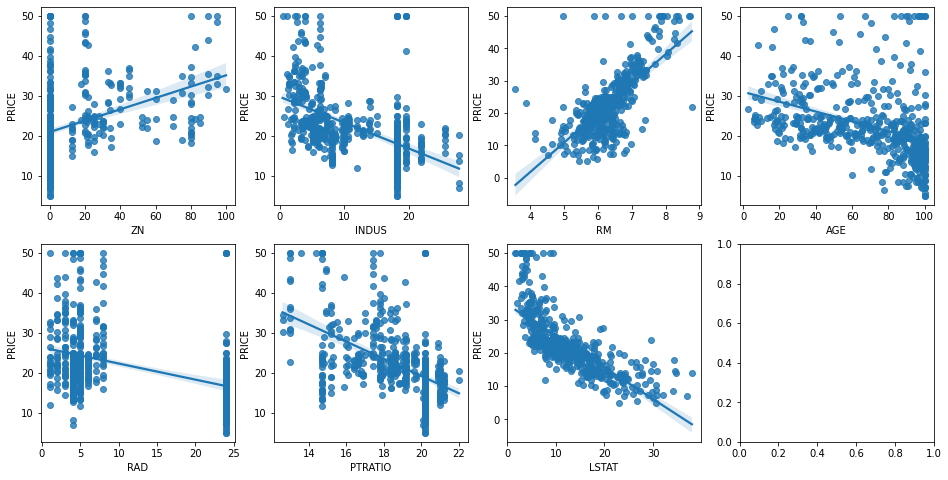

In [88]:
import seaborn as sns 
features = ['ZN','INDUS','RM','AGE','RAD','PTRATIO','LSTAT']
fig, ax = plt.subplots(figsize = (16,8), ncols =4, nrows=2)
for i, feature in enumerate(features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=ax[row][col])
plt.show()    

### seaborn 산점도 행렬

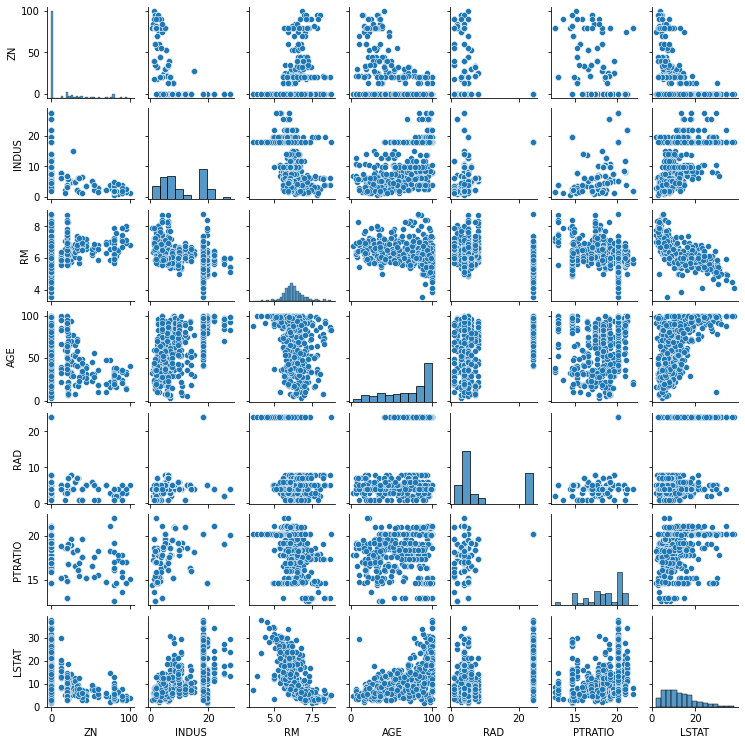

In [94]:
features = ['ZN','INDUS','RM','AGE','RAD','PTRATIO','LSTAT']
sns.pairplot(df[features], height =1.5)
plt.show()

### 상관계수 행렬

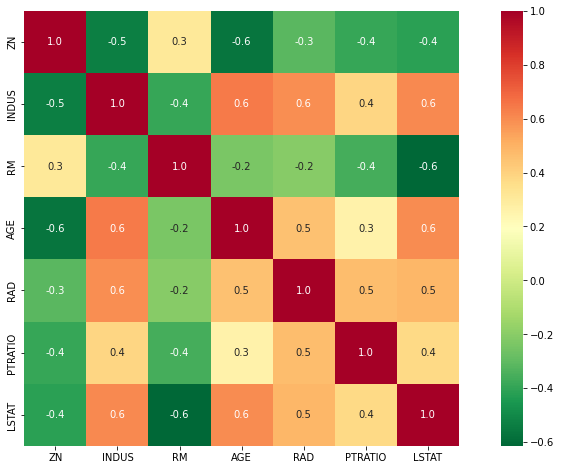

In [108]:
cm = np.corrcoef(df[features].values.T)
plt.figure(figsize=(15,8))
hm = sns.heatmap(cm, cmap='RdYlGn_r', cbar=True, annot=True, square=True, fmt = '.1f', xticklabels=features, yticklabels=features)
# cmap = 히트맵 색상변경 위한 컬러맵 지정
# annot = 히트맵에 상관계수 출력 여부 지정
# fmt = 상관계수 출력시 자릿수 지정
# ticklabels = 히트맵 축 레이블 출력시 컬럼명 지정

### 회귀분석 실시

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [121]:
Xtrain, Xtest, ytrain, ytest = train_test_split(boston.data, boston.target, train_size=0.7, random_state=2111081145)

In [122]:
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [171]:
np.set_printoptions(precision=2)
print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_,2))

기울기 [[2.64]]
절편 [75.57]


#### 공부한 시간 대비 성적 예측을 LinearRegression으로 풀기

In [218]:
time = [2,4,6,8]
jumsu = [81, 93, 91, 97]
time = pd.DataFrame(time)
jumsu = pd.DataFrame(jumsu)

In [219]:
lrclf = LinearRegression()
lrclf.fit(time, jumsu)

LinearRegression()

In [179]:
print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_,2))

기울기 [[2.3]]
절편 [79.]


In [221]:
time = [2,4,6,8]
jumsu = [81, 93, 91, 97]

In [211]:
Xtrain, Xtest, ytrain, ytest = train_test_split(pd.DataFrame(time), pd.DataFrame(jumsu), train_size=0.7, random_state=2111081155)

In [212]:
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [213]:
np.set_printoptions(precision=2)
print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_,2))

기울기 [[2.67]]
절편 [75.67]


In [201]:
lrclf = LinearRegression()
lrclf.fit(np.array(time).reshape(-1,1), jumsu)

LinearRegression()

In [202]:

print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_,2))

기울기 [2.3]
절편 79.0


#### reshape(-1,1) : 행 우선(가로) 데이터를 열 우선(세로) 데이터로 변경
#### [1,2,3,4,5] -> reshape -> 
#### [[1],
####  [2], 
####  [3]]

#### 종속변수 구조 재배열

In [165]:
np.array(time)
np.array(time).reshape(-1,1)

array([[2],
       [4],
       [6],
       [8]])

### 선형회귀 모델 평가 : R^2, RMSE

In [220]:
mse = mean_squared_error(ytest, pred)
np.sqrt(mse)
r2_score(ytest, pred)

-21.444444444444382

### 공부한 시간 대비 성적 예측을 statsmodels의 OLS로 풀어 봄

In [215]:
import statsmodels.api as sm

In [223]:
time = [2,4,6,8]
jumsu = [81, 93, 91, 97]

In [224]:
df = pd.DataFrame({'time':time, 'jumsu':jumsu})
df.head()

,time,jumsu
0,2,81
1,4,93
2,6,91
3,8,97


### OLS(종속변수, 독립변수, 옵션)

In [226]:
df['intercept'] = 1  # 절편 추가
lm = sm.OLS(df.jumsu, df[['time', 'intercept']])
result = lm.fit()
result.summary()

/opt/miniconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  jumsu   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     6.373
Date:                Mon, 08 Nov 2021   Prob (F-statistic):              0.128
Time:                        12:46:35   Log-Likelihood:                -9.9083
No. Observations:                   4   AIC:                             23.82
Df Residuals:                       2   BIC:                             22.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time           2.3000      0.911      2.525      0.128      -1.620       6.220
intercept     79.0000      4.990     15.832      0.004      57.530     100.470
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.020
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.679
Skew:                           0.911   Prob(JB):                        0.712
Kurtosis:                       2.130   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### diabetes 데이터셋으로 당뇨병 환자의 1년후 진전된 상황 예측하기

In [269]:
baedal = pd.read_csv('data/delivery.txt', header=None)
baedal.columns = ['dist', 'time']
baedal

,dist,time
0,100,20
1,150,24
2,300,36
3,400,47
4,130,22
5,240,32
6,350,47
7,200,42
8,100,21
9,110,21


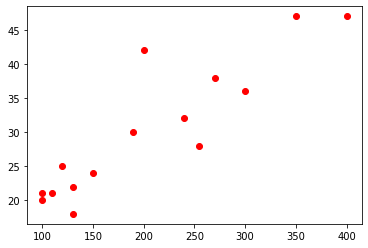

In [272]:
plt.plot(baedal.dist, baedal.time, 'ro')
plt.show()

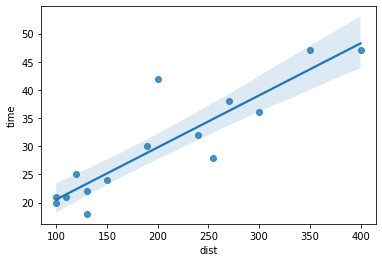

In [274]:
sns.regplot(data=baedal, x='dist', y='time')
plt.show()

In [276]:
baedal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dist    15 non-null     int64
 1   time    15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [279]:
baedal.describe()

,dist,time
count,15.000000,15.000000
mean,203.000000,30.066667
std,95.912907,9.859489
min,100.000000,18.000000
25%,125.000000,21.500000
50%,190.000000,28.000000
75%,262.500000,37.000000
max,400.000000,47.000000


In [285]:
Xtrain, Xtest, ytrain, ytest = train_test_split(np.array(baedal.dist).reshape(-1,1), baedal.time, train_size=0.9, random_state=2111081445)

In [286]:
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [295]:
print('%.2f' % lrclf.coef_[0], '%.2f' % lrclf.intercept_)

0.09 11.99


In [294]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

3.10 0.94


In [296]:
lrclf.predict(np.array([[200]]))

array([29.5])

In [298]:
pg = pd.read_csv('data/pregnant.txt',  sep ='\t')
pg.head()

,Wgt,Week,Smoke
0,2940,38,yes
1,3130,38,no
2,2420,36,yes
3,2450,34,no
4,2760,39,yes


#### 레이블 인코딩 1 - LabelEncoder

In [300]:
from sklearn.preprocessing import LabelEncoder

In [301]:
encoder = LabelEncoder()

In [302]:
encoder.fit(pg.Smoke)

LabelEncoder()

In [303]:
pg['smoke1'] = encoder.transform(pg.Smoke)

In [304]:
pg.iloc[:, [2,3]]

,Smoke,smoke1
0,yes,1
1,no,0
2,yes,1
3,no,0
4,yes,1
5,yes,1
6,no,0
7,yes,1
8,no,0
9,no,0


#### 레이블 인코딩 2 = lambda function

In [306]:
pg['smoke2'] = pg.Smoke.apply(lambda x: 0 if x =='no' else 1)
pg.iloc[:, [2,4]].head()

,Smoke,smoke2
0,yes,1
1,no,0
2,yes,1
3,no,0
4,yes,1


#### 레이블 인코딩 3 = pandas의 categorical 함수

#### Categorical을 이용해서 범주형 변수로 변환

In [309]:
pd.Categorical(pg.Smoke)

['yes', 'no', 'yes', 'no', 'yes', ..., 'yes', 'no', 'yes', 'yes', 'no']
Length: 32
Categories (2, object): ['no', 'yes']

In [310]:
pg.Smoke.astype('category')

0     yes
1      no
2     yes
3      no
4     yes
5     yes
6      no
7     yes
8      no
9      no
10    yes
11     no
12    yes
13     no
14     no
15    yes
16     no
17    yes
18     no
19    yes
20     no
21    yes
22     no
23    yes
24    yes
25     no
26     no
27    yes
28     no
29    yes
30    yes
31     no
Name: Smoke, dtype: category
Categories (2, object): ['no', 'yes']

In [314]:
pg['smoke3'] = pd.Categorical(pg.Smoke)
pg

,Wgt,Week,Smoke,smoke1,smoke2,smoke3
0,2940,38,yes,1,1,yes
1,3130,38,no,0,0,no
2,2420,36,yes,1,1,yes
3,2450,34,no,0,0,no
4,2760,39,yes,1,1,yes
5,2440,35,yes,1,1,yes
6,3226,40,no,0,0,no
7,3301,42,yes,1,1,yes
8,2729,37,no,0,0,no
9,3410,40,no,0,0,no


In [315]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Wgt     32 non-null     int64   
 1   Week    32 non-null     int64   
 2   Smoke   32 non-null     object  
 3   smoke1  32 non-null     int64   
 4   smoke2  32 non-null     int64   
 5   smoke3  32 non-null     category
dtypes: category(1), int64(4), object(1)
memory usage: 1.5+ KB


#### Series 객체에서 지원하는 cat.codes를 이용해서 category별 인코딩값 확인

In [318]:
pg['smoke3'] = pg.smoke3.cat.codes

In [319]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Wgt     32 non-null     int64 
 1   Week    32 non-null     int64 
 2   Smoke   32 non-null     object
 3   smoke1  32 non-null     int64 
 4   smoke2  32 non-null     int64 
 5   smoke3  32 non-null     int8  
dtypes: int64(4), int8(1), object(1)
memory usage: 1.4+ KB


In [230]:
from sklearn.datasets import load_diabetes

In [237]:
diabetes = load_diabetes()

In [260]:
df1 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
df1[''] = boston.target
df1head()

In [243]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [250]:
Xtrain, Xtest, ytrain, ytest = train_test_split(diabetes.data, diabetes.target, train_size=0.7, test_size=0.3, random_state=2111081305)

In [255]:
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [256]:

print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_,2))

기울기 [  18.13 -135.28  524.95  296.49 -654.08  353.26   67.95  191.11  630.76
   28.56]
절편 148.55


In [257]:
mse = mean_squared_error(ytest, pred)
np.sqrt(mse)
r2_score(ytest, pred)

0.577520378577703

In [265]:
lm2 = sm.OLS(diabetes.target, diabetes.data)
result = lm2.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              5.100
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                    4.72e-07
Time:                        13:16:55   Log-Likelihood:                         -2873.9
No. Observations:                 442   AIC:                                      5768.
Df Residuals:                     432   BIC:                                      5809.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 시각화

<AxesSubplot:xlabel='smoke3', ylabel='Wgt'>

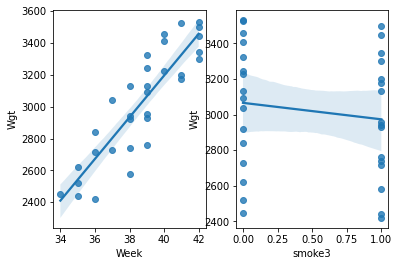

In [325]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.regplot(x='Week', y='Wgt', data=pg, ax=ax1)
sns.regplot(x='smoke3', y='Wgt', data=pg, ax=ax2)

#### 독립변수에 범주형 변수가 포함되어 있을 때 회귀분석을 실시하려면 독립변수를 범주형 변수의 기준으로 나눠보기

### 흡연하는 산모의 경우

<AxesSubplot:xlabel='Week', ylabel='Wgt'>

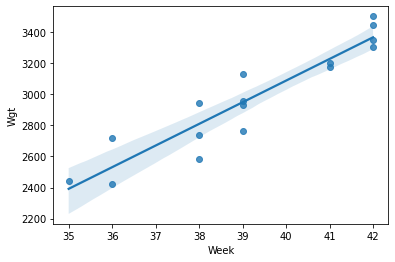

In [345]:
sp = pg.loc[pg.smoke3 ==1, ['Week', 'Wgt']]
sns.regplot(x='Week', y='Wgt', data=sp)

In [350]:
Xtrain, Xtest, ytrain, ytest = train_test_split(np.array(sp.Week).reshape(-1,1), sp.Wgt, train_size=0.9, random_state=2111081545)

In [351]:
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [352]:
print(lrclf.coef_[0], '%.2f' % lrclf.intercept_)

139.80555555555557 -2502.13


In [353]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

23.00 0.99


### 흡연하지 않는 산모의 경우

<AxesSubplot:xlabel='Week', ylabel='Wgt'>

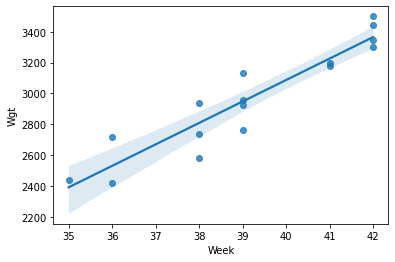

In [354]:
nsp = pg.loc[pg.smoke3 == 0, ['Week', 'Wgt']]
sns.regplot(x='Week', y='Wgt', data=sp)

In [359]:
Xtrain, Xtest, ytrain, ytest = train_test_split(np.array(nsp.Week).reshape(-1,1), nsp.Wgt, train_size=0.9, random_state=2111081545)

In [360]:
lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [361]:
print(lrclf.coef_[0], '%.2f' % lrclf.intercept_)

139.89128094725518 -2268.77


In [362]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

120.41 0.93


In [ ]:
경사하강법gradient descent

머신러닝 및 딥러닝 알고리즘을 학습시킬때 사용하는 방법

실제값과 예측값의 오차가 손실함수(Loss Function) 라 함

즉, 이 손실 함수가 0에 가깝게 줄어들게 만드는 것이 학습의 목표

이 오차를 비용이라고 판단하여, 비용함수(Cost Funtion) 라고도 함

손실함수의 최소값을 찾기 위해, 임의의 가중치를 설정하고 그 점에서 미분(기울기)을 계산하고,

이 값이 적합한지 계속 탐색하는 과정을 반복

앞이 보이지 않는 안개가 낀 산을 내려올 때는 모든 방향으로 산을 더듬어가며 산의 높이가 가장 낮아지는 방향으로 한 발씩 내딛어갈 수 있다


우리가 주로 실제 분석에서 맞딱드리게 되는 손실함수들은 형태가 복잡해 (가령, 비선형함수) 미분계수와 그 근을 계산하기 어려운 경우가 많고,

실제 미분계수를 계산하는 과정을 컴퓨터로 구현하는 것이 어렵기 때문에 경사하강법을 사용함

경사 하강법의 한계점

실제 손실함수는 저렇게 깔끔한 이차 함수 형태를 띄지 않음

복잡한 형태의 다차 함수를 띔

데이터셋이 많아지면, 당연히 계산량도 무지막지하게 많아짐

그로 인해 학습 속도가 매우 느려짐

랜덤 하게 선택된 가중치가 지역최소해Local minimum에 수렴해버리면, 실제 목표인 전역최소해Global minimum을 찾지 못하는 문제가 발생할 수 있음

손실함수의 모양이 전반적으로 곡선이더라도, 이 곡선 안에 평탄한 영역plateau이 존재할 수도 있음

이 영역에서는 학습속도가 매우 느려짐

더이상 학습이 진행되지 않는 가중치 소실 문제 발생

데이터의 형태에 따라 SGD, Adam, Momentum, Adagrad 등을 선택적으로 사용